<a href="https://colab.research.google.com/github/m0zzarella/Fundus-Imaging/blob/main/macula_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import cv2 as cv2
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import glob
import os
from skimage import data, io, filters
from skimage.metrics import structural_similarity

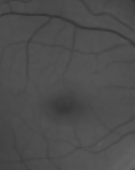

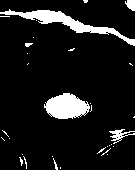

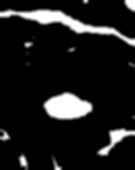

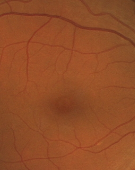

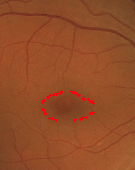

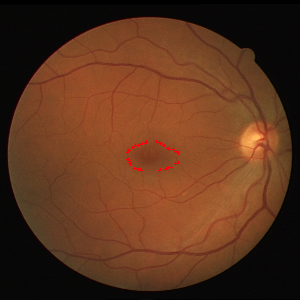

"\nimg = cv2.imread(file, cv2.IMREAD_UNCHANGED)\nb,green_channel,r = cv2.split(img)\n#plt.imshow(green_channel, cmap = 'gray')\n#grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n#plt.imshow(grayscale, cmap = 'gray')\n\n#applying CLAHE\nclahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))\nenhanced_img = clahe.apply(green_channel) \n\ncv2_imshow(enhanced_img)\n"

In [62]:
from google.colab.patches import cv2_imshow
file = "/content/40_training.jpeg"
img = cv2.imread(file, cv2.IMREAD_UNCHANGED) 
image = cv2.resize(img,(300,300)) 
r,g,b = cv2.split(image) 

green = cv2.bilateralFilter(g, 5, 17, 17)

green = green[50:220, 85:220]
cv2_imshow(green)

blur = cv2.GaussianBlur(green,(31,31),5)

Thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,33,2)
cv2_imshow(Thresh)


kernel1 = np.ones((3,3), np.uint8)
kernel2 = np.ones((3,3), np.uint8)
disk = cv2.dilate(Thresh, kernel1, iterations=2)
disk = cv2.erode(disk, kernel2, iterations=1)
disk = cv2.erode(disk, kernel1, iterations=1)


disk = cv2.GaussianBlur(disk,(5,5),1.5)

cv2_imshow(disk)

cropm = image[50:220,85:220]

cv2_imshow(cropm)

#find ellipse 

contours,h = cv2.findContours(disk, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
     
peri =157.23
if len(contours) != 0:
     for c in contours:
          arclen = cv2.arcLength(c, True)
          area = cv2.contourArea(c)
          (x,y),r = cv2.minEnclosingCircle(c)
            
          cond = 800<=area<=1500 and len(c)>=5 and 100<arclen<175 and int(y)>50

          if cond:
              cv2.drawContours(cropm,c,-1,(10,0,255),2)
              peri = cv2.arcLength(c, True) #finds the Contour Perimeter
cv2_imshow(cropm)

cv2_imshow(image)
'''
img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
b,green_channel,r = cv2.split(img)
#plt.imshow(green_channel, cmap = 'gray')
#grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(grayscale, cmap = 'gray')

#applying CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_img = clahe.apply(green_channel) 

cv2_imshow(enhanced_img)
'''